In [ ]:
import pandas as pd
import numpy as np 
from bs4 import BeautifulSoup
import nltk
import re
from google.colab import drive
drive.mount('/content/gdrive')
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from gensim.models.word2vec import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from gensim.models.word2vec import Word2Vec
from gensim.test.utils import common_texts
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data=pd.read_csv("/content/gdrive/My Drive/CV/DataSet.csv")

In [ ]:
data.head()

Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

In [ ]:
categories=np.unique(data["Category"].values)

In [ ]:
print(f"Il y a {len(categories)} categories différentes")
print("Les différentes catégories sont :")
for categorie in categories:
  print(categorie)

Il y a 25 categories différentes
Les différentes catégories sont :
Advocate
Arts
Automation Testing
Blockchain
Business Analyst
Civil Engineer
Data Science
Database
DevOps Engineer
DotNet Developer
ETL Developer
Electrical Engineering
HR
Hadoop
Health and fitness
Java Developer
Mechanical Engineer
Network Security Engineer
Operations Manager
PMO
Python Developer
SAP Developer
Sales
Testing
Web Designing


In [ ]:
print("Distribution des classes :")
for categorie in categories : 
  print(f'il y a {len(data[data["Category"]==categorie])} texte dans la categorie {categorie}')

Distribution des classes :
il y a 20 texte dans la categorie Advocate
il y a 36 texte dans la categorie Arts
il y a 26 texte dans la categorie Automation Testing
il y a 40 texte dans la categorie Blockchain
il y a 28 texte dans la categorie Business Analyst
il y a 24 texte dans la categorie Civil Engineer
il y a 40 texte dans la categorie Data Science
il y a 33 texte dans la categorie Database
il y a 55 texte dans la categorie DevOps Engineer
il y a 28 texte dans la categorie DotNet Developer
il y a 40 texte dans la categorie ETL Developer
il y a 30 texte dans la categorie Electrical Engineering
il y a 44 texte dans la categorie HR
il y a 42 texte dans la categorie Hadoop
il y a 30 texte dans la categorie Health and fitness
il y a 84 texte dans la categorie Java Developer
il y a 40 texte dans la categorie Mechanical Engineer
il y a 25 texte dans la categorie Network Security Engineer
il y a 40 texte dans la categorie Operations Manager
il y a 30 texte dans la categorie PMO
il y a 48 te

L'objectif va etre de retraiter les données de texte (Suprimer les differentes balises, les stop words ) puis  essayer de clusteriser les mots afin d'effectuer une classification sur les centroides des clusters afin de classifier un cv dans un domaine de compétence.
Nous allons commencer par ecrire les différentes fonction de retraitement des fichier textes afin d'entrainer un word2vec.

In [ ]:

stop_words = set(stopwords.words('english')) 
sent_tokenize = nltk.data.load('tokenizers/punkt/english.pickle')


def preprocess_text(text):

    soup=BeautifulSoup(text)
    text=soup.get_text()
    text=text.lower().replace("'","")
    text=re.sub('[^A-Za-z0-9]+', ' ', text)
    
    filtered_sentence = []  
    word_tokens = text.split(" ")
    for w in word_tokens:  
        if w not in stop_words:  
            filtered_sentence.append(w)

    return filtered_sentence

def get_sentences(text,tokenizer):
    liste= tokenizer.tokenize(text)
    new_liste=[]
    for sentence in liste:
        sentence=preprocess_text(sentence)
        new_liste.append(sentence)

    return new_liste

sent_tokenize = nltk.data.load('tokenizers/punkt/english.pickle')

In [ ]:
data['sentences']=data['Resume'].apply(lambda x: get_sentences(x,sent_tokenize))

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Affichage d'un wordcloud pour chaque catégories presente dans le dataset


In [ ]:

listeWord=[]
for categorie in categories:

  text=data[data["Category"]==categorie].sentences.values
  wordlist=[]
  for liste in text:
    for element in liste:
      if len(element)>0:
        for word in element:
          wordlist.append(word)

  wordcloud = WordCloud(
      width = 300,
      height = 200,
      background_color = 'black').generate((" ".join(wordlist)))

  listeWord.append((wordcloud,categorie))


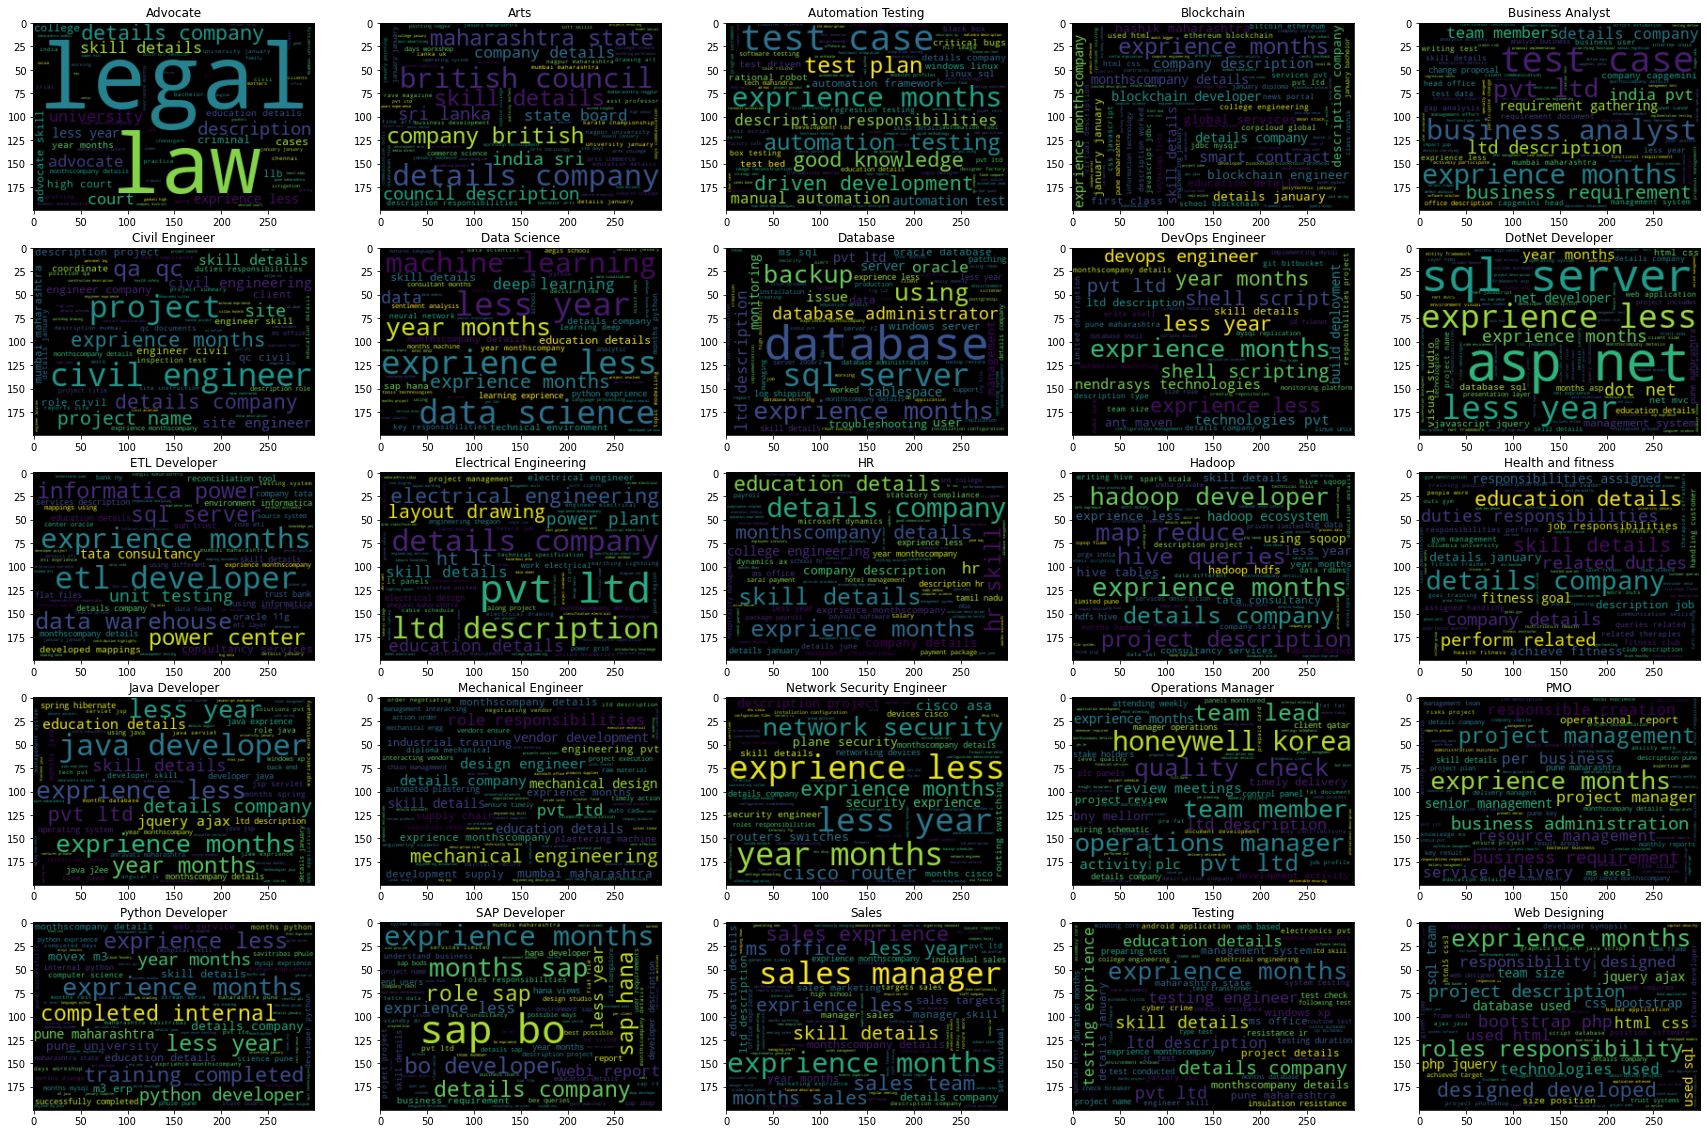

In [ ]:
e=0
fig , ax = plt.subplots(nrows = 5, ncols = 5,figsize=(30,20))

for i in range(0,5):
  for j in range(0,5):

    ax[i,j].imshow(listeWord[e][0], interpolation = 'bilinear')
    ax[i,j].set_title(listeWord[e][1])
    e=e+1

plt.show()

Recuperation du texte pour l'entrainement de Word2Vec.

---



In [ ]:
textListe=data['sentences'].values.tolist()
nb_phrase=0
sentesencesList=[]
for element in textListe:
    nb_phrase=nb_phrase+len(element)
    for sentence in element:
        sentesencesList.append(sentence)
print(f'il y a {nb_phrase} phrases.')

il y a 21599 phrases.


In [ ]:
model=Word2Vec(sentences=sentesencesList,size=300, workers=4, window=2,min_count=30,sample=0.0001)

In [ ]:
model.save("/content/gdrive/My Drive/CV/word2vec.model")

In [ ]:
model = Word2Vec.load("/content/gdrive/My Drive/CV/word2vec.model")

In [ ]:
stop_words = set(stopwords.words('english')) 
sent_tokenize = nltk.data.load('tokenizers/punkt/english.pickle')


def preprocess_text(text):

    soup=BeautifulSoup(text)
    text=soup.get_text()
    text=text.lower()
    text=re.sub('[^A-Za-z0-9]+', ' ', text)
    
    filtered_sentence = []  
    word_tokens = text.split(" ")
    for w in word_tokens:  
        if w not in stop_words:  
            filtered_sentence.append(w)

    return filtered_sentence

def get_centroid_vector(text,centroidDict):
    liste=preprocess_text(text)
    print(liste)
    vecteur=np.zeros(len(centroidDict))
    for key,value in centroidDict.items():
        vecteur[value]=liste.count(key)
    return vecteur

On va maintenant separer nos variable en target et features, puis label encoder nos targets.

In [ ]:
print(f'Le nombre de cluster est de {(len(model.wv.vocab)//5)}')

Le nombre de cluster est de 366


In [ ]:
kmeans = KMeans(n_clusters=(len(model.wv.vocab)//5)).fit_predict(model[model.wv.vocab])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
centroidDict={}
for i in range(len(kmeans)):
    centroidDict[list(model.wv.vocab.keys())[i]]=kmeans[i]

In [ ]:
for i in range(9):
    print(f"centroid {i} :")
    for key,value in centroidDict.items():
        if value==i:
            print(key)
    print('===========')

In [ ]:
data['centroid_vector']=data['Resume'].apply(lambda x: get_centroid_vector(x,centroidDict))

['skills', 'programming', 'languages', 'python', 'pandas', 'numpy', 'scipy', 'scikit', 'learn', 'matplotlib', 'sql', 'java', 'javascript', 'jquery', 'machine', 'learning', 'regression', 'svm', 'na', 'bayes', 'knn', 'random', 'forest', 'decision', 'trees', 'boosting', 'techniques', 'cluster', 'analysis', 'word', 'embedding', 'sentiment', 'analysis', 'natural', 'language', 'processing', 'dimensionality', 'reduction', 'topic', 'modelling', 'lda', 'nmf', 'pca', 'neural', 'nets', 'database', 'visualizations', 'mysql', 'sqlserver', 'cassandra', 'hbase', 'elasticsearch', 'd3', 'js', 'dc', 'js', 'plotly', 'kibana', 'matplotlib', 'ggplot', 'tableau', 'others', 'regular', 'expression', 'html', 'css', 'angular', '6', 'logstash', 'kafka', 'python', 'flask', 'git', 'docker', 'computer', 'vision', 'open', 'cv', 'understanding', 'deep', 'learning', 'education', 'details', 'data', 'science', 'assurance', 'associate', 'data', 'science', 'assurance', 'associate', 'ernst', 'young', 'llp', 'skill', 'detai

In [ ]:
data.head()

Category  ...                                    centroid_vector
0  Data Science  ...  [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
1  Data Science  ...  [0.0, 1.0, 0.0, 2.0, 6.0, 0.0, 0.0, 0.0, 0.0, ...
2  Data Science  ...  [0.0, 0.0, 0.0, 1.0, 8.0, 0.0, 0.0, 0.0, 0.0, ...
3  Data Science  ...  [0.0, 0.0, 0.0, 1.0, 6.0, 0.0, 0.0, 0.0, 0.0, ...
4  Data Science  ...  [0.0, 0.0, 0.0, 1.0, 6.0, 0.0, 0.0, 0.0, 0.0, ...

[5 rows x 4 columns]

In [ ]:
y=data["Category"].values
X=data["centroid_vector"].values

In [ ]:
le=preprocessing.LabelEncoder()
#y=le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'Il y a bien {len(np.unique(y_train))} classe dans le set de train et {len(np.unique(y_test))} classe dans le set de test')

Il y a bien 25 classe dans le set de train et 25 classe dans le set de test


In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train=X_train.tolist()
X_test=X_test.tolist()

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Nous avons une accuracy de : 0.9844559585492227


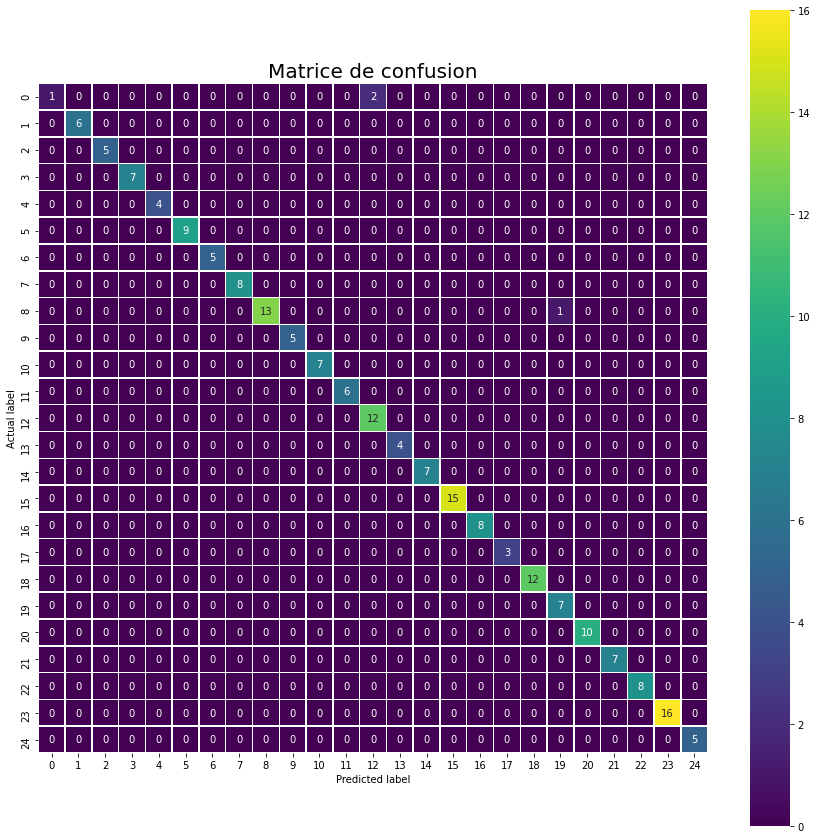

In [ ]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

y_pred=clf.predict(X_test)
score=metrics.accuracy_score(y_test,y_pred)


print("Nous avons une accuracy de : {}".format(score))

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'viridis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size = 20)
plt.show()

In [ ]:
!pip install pytesseract
!pip install pdf2image
!sudo apt install tesseract-ocr
!sudo apt install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image
from pdf2image import convert_from_path

In [ ]:
text=""
images = convert_from_path('/content/gdrive/My Drive/CV/test/data.pdf')
for image in images:
  text += pytesseract.image_to_string(image, lang="eng")

print(text)
vector=get_centroid_vector(text,centroidDict)
y_pred=clf.predict([vector])
y_pred